# Import Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Mount the drive and read the dataset

In [4]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [5]:
df = pd.read_csv('Tweets.csv')

In [6]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


# Select the most relevent columns

In [7]:
df = df[['airline_sentiment', 'text']] # However, we can also look at the confidence score in this column

In [8]:
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


# Change column names to labels and text

In [9]:
df.columns = ['labels', 'text']

In [10]:
df.head()

,labels,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


# Check if the dataset is unbalanced

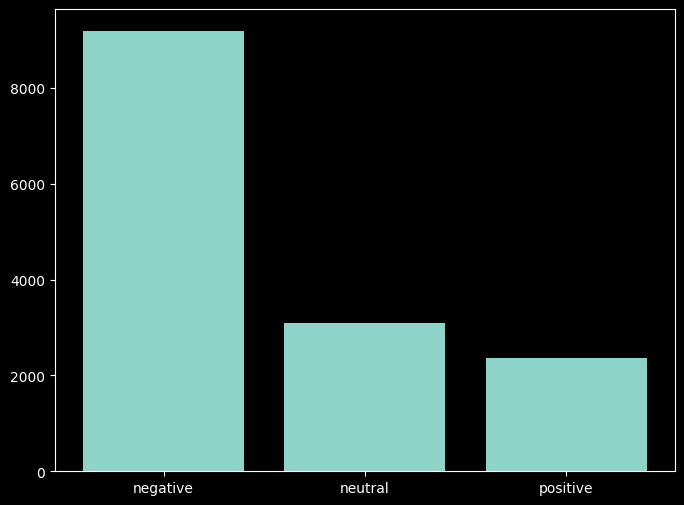

In [11]:
plt.figure(figsize = (8,6))
x, y = np.unique(df['labels'], return_counts=True)
plt.bar(x, y, align='center')
plt.gca().set_xticks(x)
plt.show()

In [12]:
df['labels'].value_counts()

labels
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

# Change labels into number

In [13]:
df['labels'] = df['labels'].map({'negative': 0, 'positive': 1, 'neutral': 2})

In [14]:
df.head()

,labels,text
0,2,@VirginAmerica What @dhepburn said.
1,1,@VirginAmerica plus you've added commercials t...
2,2,@VirginAmerica I didn't today... Must mean I n...
3,0,@VirginAmerica it's really aggressive to blast...
4,0,@VirginAmerica and it's a really big bad thing...


In [15]:
df.isnull().any()

labels    False
text      False
dtype: bool

# Extract features and labels from the dataset

In [16]:
features = df['text']
labels = df['labels']

# Splt the data into training and testing

In [17]:
train_data, test_data, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, random_state = 42)

# Build a pipeline to perform word to number mapping and classification in a single step

In [18]:
from sklearn.pipeline import Pipeline

In [19]:
model = Pipeline([('tfidf', TfidfVectorizer(max_features = 2000)),('classifier', LogisticRegression(max_iter = 500)),])

In [20]:
model.fit(train_data, train_labels)
y_pred = model.predict(test_data)

# Create Confusion Matrix

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

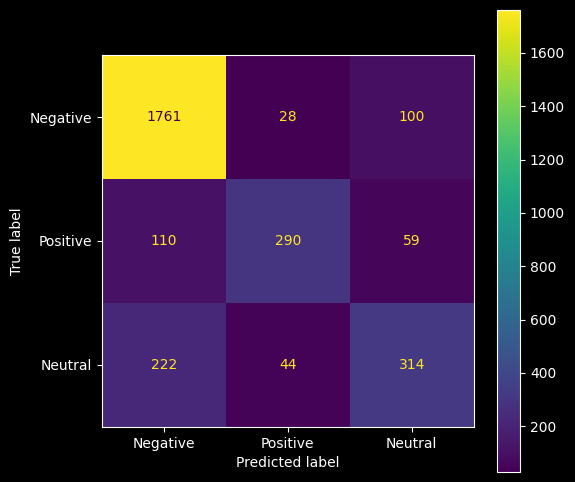

In [22]:
cm = confusion_matrix(test_labels,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= ['Negative','Positive','Neutral'])
disp.plot(xticks_rotation=0)
fig = disp.ax_.get_figure()
fig.set_figwidth(6)
fig.set_figheight(6)
plt.show()

In [23]:
# confusion matrix shows that model is biased towards negative class

# Calculate Accuracy, Precision, Recall and F1_Score

In [24]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report

In [25]:
print("Accuracy : %2.2f" % (accuracy_score(test_labels, y_pred, normalize=True)))
print("Precision : %2.2f" % (precision_score(test_labels, y_pred, average = 'macro')))
print("Recall : %2.2f" % (recall_score(test_labels, y_pred, average = 'macro')))
print("F1_Score : %2.2f" % (f1_score(test_labels, y_pred, average = 'macro')))

Accuracy : 0.81
Precision : 0.77
Recall : 0.70
F1_Score : 0.73


In [26]:
print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1889
           1       0.80      0.63      0.71       459
           2       0.66      0.54      0.60       580

    accuracy                           0.81      2928
   macro avg       0.77      0.70      0.73      2928
weighted avg       0.80      0.81      0.80      2928



# Observe word to index mapping

In [27]:
word_index_map = model[0].vocabulary_
word_index_map

{'united': 1841,
 'you': 1995,
 'are': 178,
 'offering': 1235,
 'us': 1860,
 'rooms': 1495,
 'for': 758,
 '32': 40,
 'people': 1304,
 'fail': 671,
 'jetblue': 978,
 'jfk': 980,
 'nyc': 1229,
 'staff': 1647,
 'is': 961,
 'amazing': 135,
 'the': 1728,
 'lax': 1020,
 'sending': 1551,
 'an': 143,
 'email': 604,
 'with': 1953,
 'details': 525,
 'but': 305,
 'it': 966,
 'was': 1898,
 'disappointing': 543,
 'experience': 654,
 'well': 1922,
 'last': 1017,
 'update': 1851,
 'in': 932,
 'right': 1490,
 'at': 200,
 'least': 1024,
 'll': 1061,
 'keep': 988,
 'my': 1189,
 'fingers': 718,
 'crossed': 463,
 'americanair': 138,
 'flight': 729,
 'still': 1663,
 'sitting': 1595,
 'dfw': 526,
 'waiting': 1889,
 'baggage': 237,
 'to': 1765,
 'be': 249,
 'loaded': 1063,
 'southwestair': 1634,
 'your': 1996,
 'companion': 404,
 'pass': 1287,
 'broken': 293,
 'today': 1766,
 'purchase': 1401,
 'error': 623,
 'hours': 903,
 'on': 1247,
 'hold': 887,
 'http': 910,
 'co': 388,
 've': 1874,
 'been': 254,
 'tryi

# Check the model performance

In [28]:
tweet = "Slow service"

In [29]:
model.predict([tweet])

array([0])

In [30]:
tweet2 = "Good food"

In [31]:
model.predict([tweet2])

array([1])

In [32]:
tweet3 = "I can't say"

In [33]:
model.predict([tweet3])

array([2])